# Introduction to Derjaguin-Landau-Verwey-Overbeek (DLVO) theory: Lecture 4

This is a brief exploration of the effect of key properties on the form of the DLVO potential between two charged spherical colloids

$$U_{tot}(h) = U_{e}(h) + U_{d}(h)$$

Here $h$ is the sphere surface-to-surface separation, $U_{e}(h)$ is the repulsive electrostatic Double-layer energy, and $U_{d}(h)$ is the attractive van der Waals dispersion energy. 
From the lectures you will remember that (under certain restictions)

$$\frac{U_{tot}(h)} {k_{B}T} = \Phi_{s}^{2} \frac{ R^{2}}{r \lambda_{B}} \exp (-\kappa h) - \frac{(A_{21}/ k_{B}T)R}{12 h}$$

In the calculations below all distances are scaled by the Bjerrum length $\lambda_{B}$. Remember in water at 298K the Bjerrum length $\lambda_{B}$ is 0.72 nm.

# To use

* select "cell" then "Run All" to make notebook "live"

# Variables:

* *PhiS* is the (dimensionless) colloid surface potential $\Phi_{S} = e \phi_{S} / k_{B}T$

* *Radius* is the scaled colloid radius $R / \lambda_{B}$

* *Logdebye* is log (base 10) of the Debye length (in units of Bjerrum length), $\log_{10} (\kappa^{-1} / \lambda_{B} )$

* *Hamaker* is the scaled Hamaker constant, $A_{21} / k_{B}T $


# Things to do

* Adjust the logdebye slider, with all other parameters at default values. Note the change in the distance dependence of the potential $U_{tot}(h)$

* Note how the height of the potential maximum $U^{*} /k_{B}T$ at small $h$ drops markedly (with increased screening of the repulsive forces) as the Debye length is reduced 

* The critical coagulation concentration (ccc) where $U^{*} = 0$. At what Debye length is the ccc? What is the equivalent monovalent (1:1) salt concentration?

* What is the effect of increasing $\Phi_{s}$ on the ccc?

* What is the effect of increasing the Hamaker constant $A_{21} /k_{B}T$?

* Does changing the radius have any effect on the position of ccc? Explain your result. 

* At what Debye length $\kappa^{-1}$ is a secondary minimum in $U_{tot}$ first visible?

* How does the depth of the secondary minimum change as $\kappa^{-1}$ is altered?

*P. Bartlett, University of Bristol, 2016*


In [4]:
import matplotlib.pyplot as plt
from numpy import linspace,exp,zeros
from ipywidgets import interact
%matplotlib inline

In [5]:
def DLVO(PhiS = 2.0,Radius = 100.0,logdebye=1.0,Hamaker=1.0):
    debye = 10.0**(logdebye)
    num_points = 200
    h = linspace(0.05,5.0,num_points)
    invh = 1.0/h
    invr = 1.0/(h+2*Radius)
    U = zeros(num_points)
    U = ((PhiS*Radius)*(PhiS*Radius)) * exp(-h/debye) * invr  - ((Hamaker * Radius)/12.0) * invh
    plt.plot(h,U)
    plt.xlabel('$h/\lambda_{B}$',fontsize=24)
    plt.ylabel('$U_{tot}/k_{B}T$',fontsize=24)
    plt.title('$\kappa^{-1} / \lambda_{B} =$' +"{:.3f}".format(debye),fontsize=18)

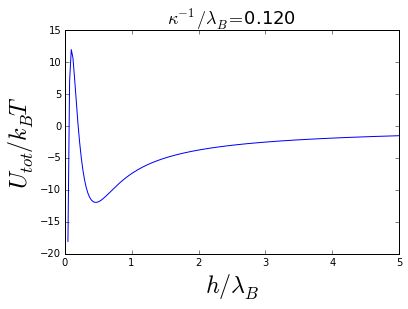

In [6]:
interact(DLVO,PhiS=[1.0,4.0,0.1],Radius=[10.0,200.0,10.0],logdebye=[-2.0,2.0,0.01],Hamaker=[0,5.0,0.1])